# Classification and regression models 

### Extract initial data

In [2]:
import os
import pandas as pd

extracted_folder_path = './data/archive'

file_path_2015 = os.path.join(extracted_folder_path, '2015.csv')
data_2015 = pd.read_csv(file_path_2015)

data_2015_info = data_2015.info()
data_2015_head = data_2015.head()

data_2015_info, data_2015_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

(None,
        Country          Region  Happiness Rank  Happiness Score  \
 0  Switzerland  Western Europe               1            7.587   
 1      Iceland  Western Europe               2            7.561   
 2      Denmark  Western Europe               3            7.527   
 3       Norway  Western Europe               4            7.522   
 4       Canada   North America               5            7.427   
 
    Standard Error  Economy (GDP per Capita)   Family  \
 0         0.03411                   1.39651  1.34951   
 1         0.04884                   1.30232  1.40223   
 2         0.03328                   1.32548  1.36058   
 3         0.03880                   1.45900  1.33095   
 4         0.03553                   1.32629  1.32261   
 
    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
 0                   0.94143  0.66557                        0.41978   
 1                   0.94784  0.62877                        0.14145   
 2                   0.

### Standarize columns and merge with the other datasets

In [3]:
def standardize_columns(df, year):
    if year == 2015:
        df.rename(columns={
            'Economy (GDP per Capita)': 'Economy (GDP per Capita)',
            'Health (Life Expectancy)': 'Health (Life Expectancy)',
            'Trust (Government Corruption)': 'Trust (Government Corruption)',
        }, inplace=True)
    elif year == 2016:
        df.rename(columns={
            'Economy (GDP per Capita)': 'Economy (GDP per Capita)',
            'Health (Life Expectancy)': 'Health (Life Expectancy)',
            'Trust (Government Corruption)': 'Trust (Government Corruption)',
        }, inplace=True)
    elif year == 2017:
        df.rename(columns={
            'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
            'Health..Life.Expectancy.': 'Health (Life Expectancy)',
            'Trust..Government.Corruption.': 'Trust (Government Corruption)',
            'Happiness.Score': 'Happiness Score',
            'Happiness.Rank': 'Happiness Rank'
        }, inplace=True)
    elif year == 2018:
        df.rename(columns={
            'Country or region': 'Country',
            'Overall rank': 'Happiness Rank',
            'Score': 'Happiness Score',
            'GDP per capita': 'Economy (GDP per Capita)',
            'Social support': 'Family',
            'Healthy life expectancy': 'Health (Life Expectancy)',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Trust (Government Corruption)',
        }, inplace=True)
    elif year == 2019:
        df.rename(columns={
            'Country or region': 'Country',
            'Overall rank': 'Happiness Rank',
            'Score': 'Happiness Score',
            'GDP per capita': 'Economy (GDP per Capita)',
            'Social support': 'Family',
            'Healthy life expectancy': 'Health (Life Expectancy)',
            'Freedom to make life choices': 'Freedom',
            'Perceptions of corruption': 'Trust (Government Corruption)',
        }, inplace=True)
    return df

data_2015 = standardize_columns(pd.read_csv(os.path.join(extracted_folder_path, '2015.csv')), 2015)
data_2016 = standardize_columns(pd.read_csv(os.path.join(extracted_folder_path, '2016.csv')), 2016)
data_2017 = standardize_columns(pd.read_csv(os.path.join(extracted_folder_path, '2017.csv')), 2017)
data_2018 = standardize_columns(pd.read_csv(os.path.join(extracted_folder_path, '2018.csv')), 2018)
data_2019 = standardize_columns(pd.read_csv(os.path.join(extracted_folder_path, '2019.csv')), 2019)

data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019], ignore_index=True)



data.shape, data.head()

data.isna().sum()


Country                            0
Region                           467
Happiness Rank                     0
Happiness Score                    0
Standard Error                   624
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      1
Generosity                         0
Dystopia Residual                467
Lower Confidence Interval        625
Upper Confidence Interval        625
Whisker.high                     627
Whisker.low                      627
Dystopia.Residual                627
dtype: int64

### Filtering the dataset by key columns

In [4]:
key_columns = ['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 
               'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 
               'Generosity']

data_key = data[key_columns]

data_key = data_key.dropna()

data_key.shape, data_key.head(), data_key.isnull().sum()


((781, 9),
        Country  Happiness Rank  Happiness Score  Economy (GDP per Capita)  \
 0  Switzerland               1            7.587                   1.39651   
 1      Iceland               2            7.561                   1.30232   
 2      Denmark               3            7.527                   1.32548   
 3       Norway               4            7.522                   1.45900   
 4       Canada               5            7.427                   1.32629   
 
     Family  Health (Life Expectancy)  Freedom  Trust (Government Corruption)  \
 0  1.34951                   0.94143  0.66557                        0.41978   
 1  1.40223                   0.94784  0.62877                        0.14145   
 2  1.36058                   0.87464  0.64938                        0.48357   
 3  1.33095                   0.88521  0.66973                        0.36503   
 4  1.32261                   0.90563  0.63297                        0.32957   
 
    Generosity  
 0     0.29678

## Exploratory analysis with Pairplot and Correlation matrix

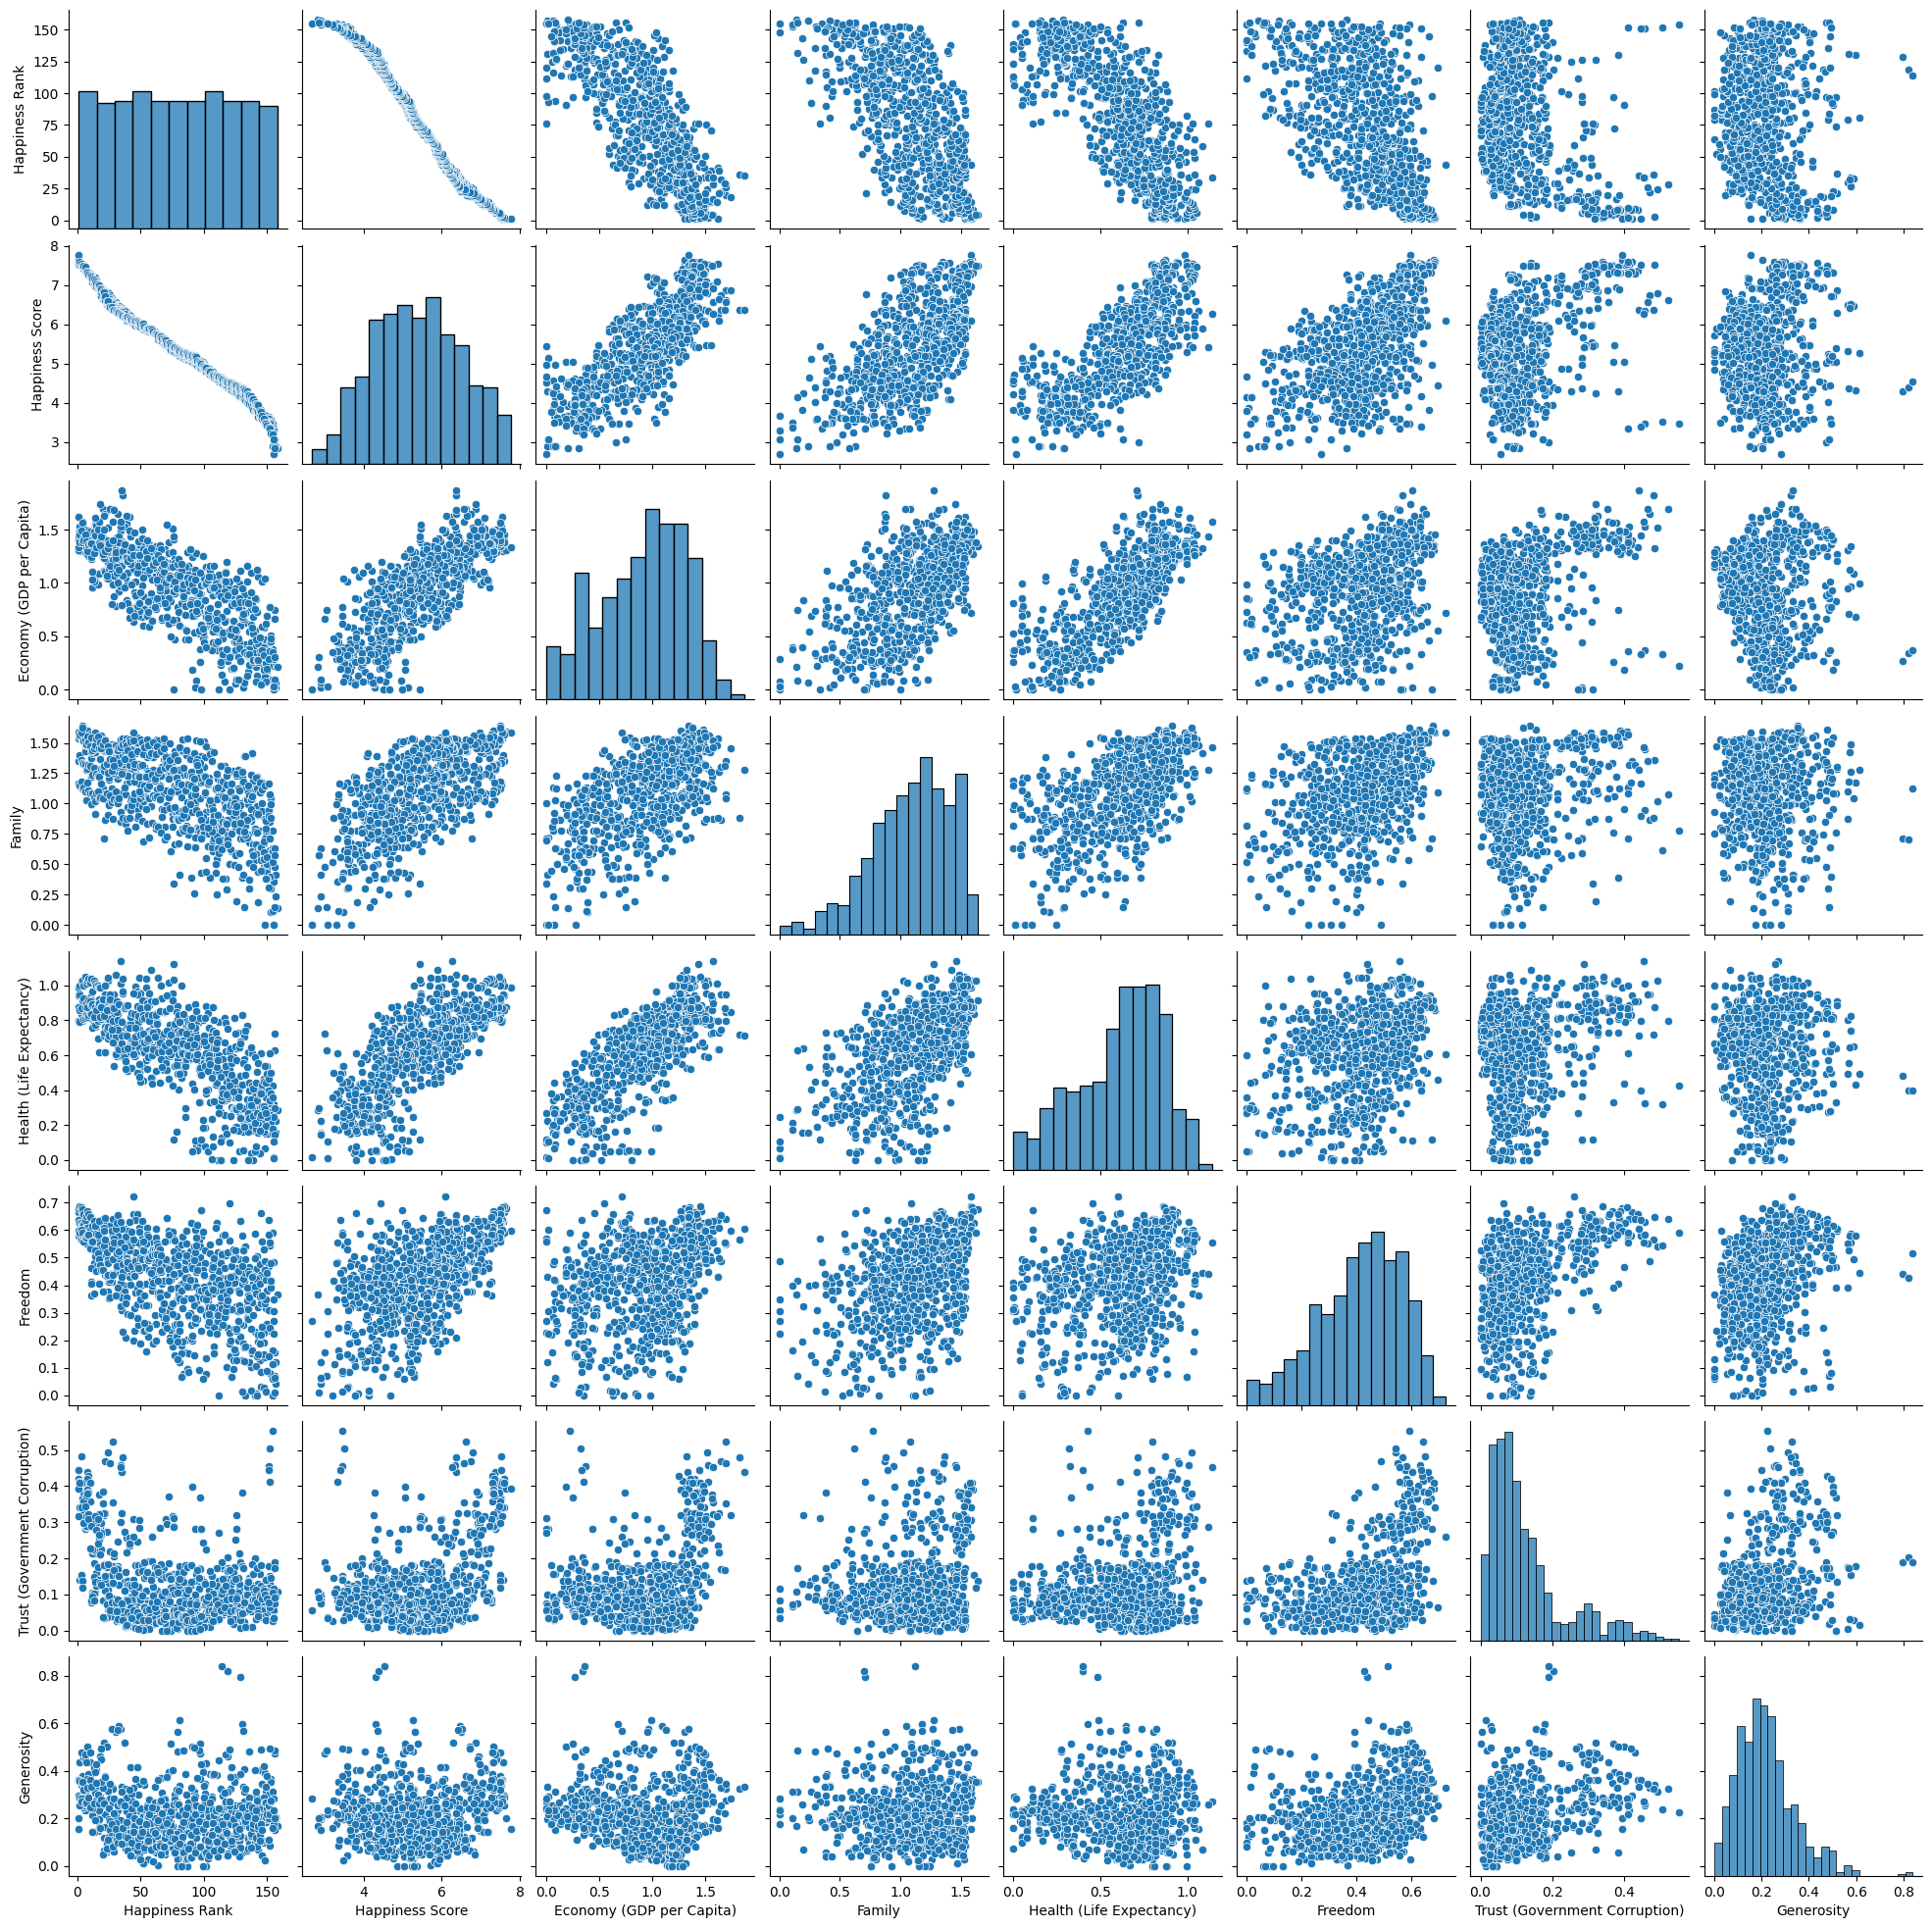

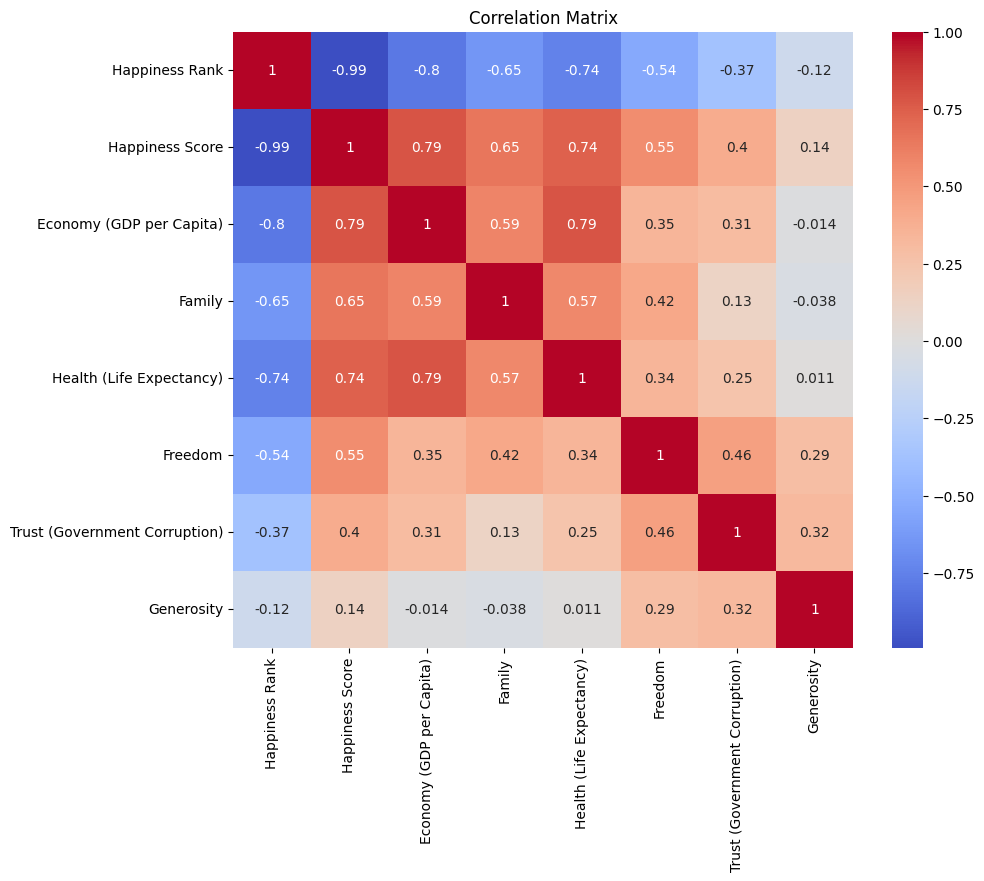

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data_key.drop(columns=['Country']))
plt.show()


data_key_numerical = data_key.drop(columns=['Country'])

correlation_matrix = data_key_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


## Regression models

### Data preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_final = data_key.drop(columns=['Country'])

X = data_final.drop(columns=['Happiness Score'])
y = data_final['Happiness Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape


((624, 7), (157, 7), (624,), (157,))

### Linear regression training and testing

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

y_pred_linear = linear_reg_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_linear, r2_linear


(np.float64(0.021155193946635124), 0.982989389316149)

### Random forest Regressor training and testing

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, r2_rf


(np.float64(0.006597337234069332), 0.9946951686889792)

### Models validation

In [9]:
from sklearn.model_selection import cross_val_score

cv_scores_linear = cross_val_score(linear_reg_model, X_train_scaled, y_train, cv=5, scoring='r2')

cv_scores_rf = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='r2')

cv_scores_linear.mean(), cv_scores_linear.std(), cv_scores_rf.mean(), cv_scores_rf.std()


(np.float64(0.985716974513155),
 np.float64(0.0015525837622215669),
 np.float64(0.9957375269188233),
 np.float64(0.0012826148767148488))

## Classification model

### Data preprocessing

In [10]:
def categorize_happiness(score):
    if score >= 7:
        return 'High'
    elif score >= 5:
        return 'Medium'
    else:
        return 'Low'

data_classification = data_key

data_classification['Happiness Category'] = data_key['Happiness Score'].apply(categorize_happiness)

data_classification['Happiness Category'].value_counts()

X_classification = data_classification.drop(columns=['Happiness Score', 'Happiness Category', 'Country'])
y_classification = data_classification['Happiness Category']

X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled_classification = scaler.fit_transform(X_train_classification)
X_test_scaled_classification = scaler.transform(X_test_classification)


### Model training and testing

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled_classification, y_train_classification)

y_pred_rf_classification = rf_classifier.predict(X_test_scaled_classification)

accuracy_rf= accuracy_score(y_test_classification, y_pred_rf_classification)
classification_report_rf = classification_report(y_test_classification, y_pred_rf_classification)

print(f"Random Forest Classifier Accuracy: {accuracy_rf}")
print("Random Forest Classifier Report:")
print(classification_report_rf)

RandomForestClassifier(random_state=42)

### Feature importance validation

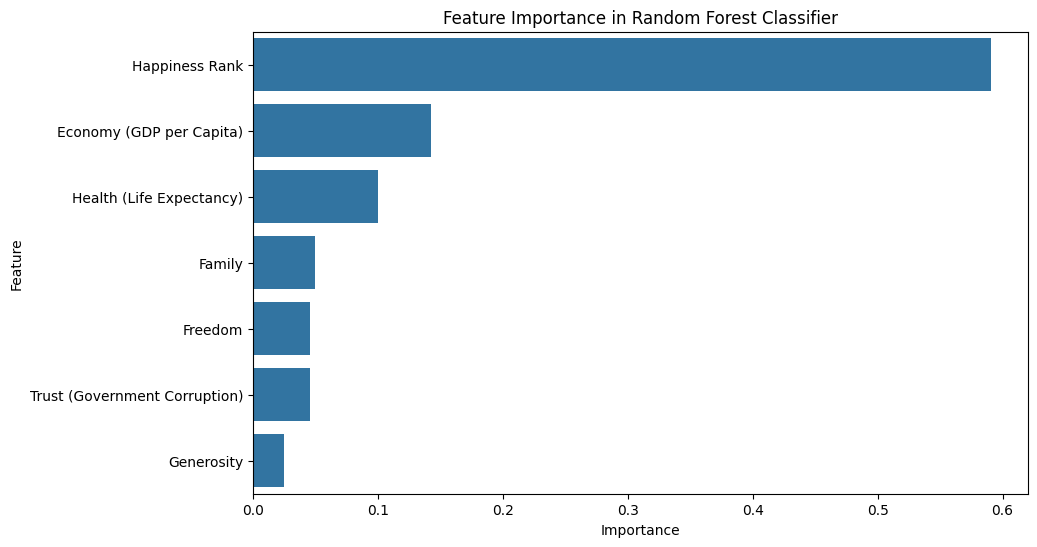

In [13]:
importances = rf_classifier.feature_importances_
features = X_classification.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
